### Problem Description:

### Business Goal:

### Dataset

In [163]:
import pandas as pd

# Load the dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Basic info
shape = df.shape
data_types = df.dtypes
head = df.head()
missing_values = df.isnull().sum()
summary = df.describe()

shape, data_types, head, missing_values, summary


((205, 26),
 car_ID                int64
 symboling             int64
 CarName              object
 fueltype             object
 aspiration           object
 doornumber           object
 carbody              object
 drivewheel           object
 enginelocation       object
 wheelbase           float64
 carlength           float64
 carwidth            float64
 carheight           float64
 curbweight            int64
 enginetype           object
 cylindernumber       object
 enginesize            int64
 fuelsystem           object
 boreratio           float64
 stroke              float64
 compressionratio    float64
 horsepower            int64
 peakrpm               int64
 citympg               int64
 highwaympg            int64
 price               float64
 dtype: object,
    car_ID  symboling                   CarName fueltype aspiration doornumber  \
 0       1          3        alfa-romero giulia      gas        std        two   
 1       2          3       alfa-romero stelvio      g

### Key components to be fulfilled:

## 1. Loading and Preprocessing 

In [164]:
 # 1.1 Load the Dataset

import pandas as pd

# Load the dataset
df = pd.read_csv("CarPrice_Assignment.csv")


In [165]:
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [166]:
 # 1.2 Inspect the Dataset

print(df.shape)             
print(df.info())            
print(df.isnull().sum())    


(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    

In [167]:
#  1.3 Extract Car Brand from Car Name

# The CarName column includes both brand and model (e.g., "alfa-romero giulia"). We’ll extract just the brand.

df['carbrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())


In [168]:
#  1.4 Fix Typos in Brand Names

# We found typos like maxda, vw, and porcshce. Let’s correct them.

brand_corrections = {
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}
df['carbrand'] = df['carbrand'].replace(brand_corrections)


In [169]:
#  1.5 Convert Text-Based Numbers to Numeric

# Some columns like doornumber and cylindernumber are in text format. We'll convert them to actual numbers.

# Door number
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})

# Cylinder number
cylinder_map = {
    'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'eight': 8, 'twelve': 12
}
df['cylindernumber'] = df['cylindernumber'].map(cylinder_map)


In [170]:
# 1.6 Drop Unnecessary Columns

# We drop car_ID and CarName because they aren’t useful for modeling.

df.drop(['car_ID', 'CarName'], axis=1, inplace=True)


In [171]:
#  1.7 Final Check

print(df.shape)             
print(df.info()) 
print(df.isnull().sum())
df.head()


(205, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbrand
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## 2. Model Implementation 

In [172]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# One-hot encoding of categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Splitting data into features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (required for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### 2.1 Linear Regression

In [173]:

# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
lr_preds = lr_model.predict(X_test)

# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr_r2 = r2_score(y_test, lr_preds)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))

print(" Linear Regression Results")
print(f"R² Score  : {lr_r2:.4f}")
print(f"MAE       : {lr_mae:.2f}")
print(f"RMSE      : {lr_rmse:.2f}")



 Linear Regression Results
R² Score  : 0.8951
MAE       : 1942.07
RMSE      : 2878.12


### 2.2  Decision Tree Regressor

In [174]:

# Initialize and train
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
dt_preds = dt_model.predict(X_test)

# Evaluation
dt_r2 = r2_score(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_preds))

print(" Decision Tree Regressor Results")
print(f"R² Score  : {dt_r2:.4f}")
print(f"MAE       : {dt_mae:.2f}")
print(f"RMSE      : {dt_rmse:.2f}")



 Decision Tree Regressor Results
R² Score  : 0.8977
MAE       : 2033.07
RMSE      : 2841.99


### 2.3 Random Forest Regressor

In [175]:

# Initialize and train
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluation
rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print(" Random Forest Regressor Results")
print(f"R² Score  : {rf_r2:.4f}")
print(f"MAE       : {rf_mae:.2f}")
print(f"RMSE      : {rf_rmse:.2f}")



 Random Forest Regressor Results
R² Score  : 0.9578
MAE       : 1286.57
RMSE      : 1825.19


### 2.4 Gradient Boosting Regressor

In [176]:

# Initialize and train
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict
gb_preds = gb_model.predict(X_test)

# Evaluation
gb_r2 = r2_score(y_test, gb_preds)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))

print(" Gradient Boosting Regressor Results")
print(f"R² Score  : {gb_r2:.4f}")
print(f"MAE       : {gb_mae:.2f}")
print(f"RMSE      : {gb_rmse:.2f}")



 Gradient Boosting Regressor Results
R² Score  : 0.9288
MAE       : 1668.86
RMSE      : 2370.92


### 2.5  Support Vector Regressor


In [177]:

# Initialize and train on scaled data
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Predict
svr_preds = svr_model.predict(X_test_scaled)

# Evaluation
svr_r2 = r2_score(y_test, svr_preds)
svr_mae = mean_absolute_error(y_test, svr_preds)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_preds))

print(" Support Vector Regressor (SVR) Results")
print(f"R² Score  : {svr_r2:.4f}")
print(f"MAE       : {svr_mae:.2f}")
print(f"RMSE      : {svr_rmse:.2f}")



 Support Vector Regressor (SVR) Results
R² Score  : -0.1008
MAE       : 5701.89
RMSE      : 9321.91


In [178]:

print("Model                  R² Score   MAE         RMSE")
print("-------------------------------------------------------")
print(f"Linear Regression      {lr_r2:<10.4f} {lr_mae:<10.2f} {lr_rmse:<10.2f}")
print(f"Decision Tree          {dt_r2:<10.4f} {dt_mae:<10.2f} {dt_rmse:<10.2f}")
print(f"Random Forest          {rf_r2:<10.4f} {rf_mae:<10.2f} {rf_rmse:<10.2f}")
print(f"Gradient Boosting      {gb_r2:<10.4f} {gb_mae:<10.2f} {gb_rmse:<10.2f}")
print(f"Support Vector         {svr_r2:<10.4f} {svr_mae:<10.2f} {svr_rmse:<10.2f}")


Model                  R² Score   MAE         RMSE
-------------------------------------------------------
Linear Regression      0.8951     1942.07    2878.12   
Decision Tree          0.8977     2033.07    2841.99   
Random Forest          0.9578     1286.57    1825.19   
Gradient Boosting      0.9288     1668.86    2370.92   
Support Vector         -0.1008    5701.89    9321.91   


## 3. Model Evaluation 

In [179]:

import pandas as pd

# Create a clean results table
evaluation_table = pd.DataFrame({
    "Model": [
        "Linear Regression", 
        "Decision Tree", 
        "Random Forest", 
        "Gradient Boosting", 
        "Support Vector Regressor"
    ],
    "R² Score": [round(lr_r2, 4), round(dt_r2, 4), round(rf_r2, 4), round(gb_r2, 4), round(svr_r2, 4)],
    "MAE": [round(lr_mae, 2), round(dt_mae, 2), round(rf_mae, 2), round(gb_mae, 2), round(svr_mae, 2)],
    "MSE": [round(lr_mse, 2), round(dt_mse, 2), round(rf_mse, 2), round(gb_mse, 2), round(svr_mse, 2)]
})

# Sort by R² descending
evaluation_table = evaluation_table.sort_values(by="R² Score", ascending=False).reset_index(drop=True)

# Display clean table
print("Model Evaluation Summary:\n")
print(evaluation_table.to_string(index=False))


Model Evaluation Summary:

                   Model  R² Score     MAE         MSE
           Random Forest    0.9578 1286.57  3331320.66
       Gradient Boosting    0.9288 1668.86  5621238.04
           Decision Tree    0.8977 2033.07  8076925.85
       Linear Regression    0.8951 1942.07  8283565.72
Support Vector Regressor   -0.1008 5701.89 86898072.68


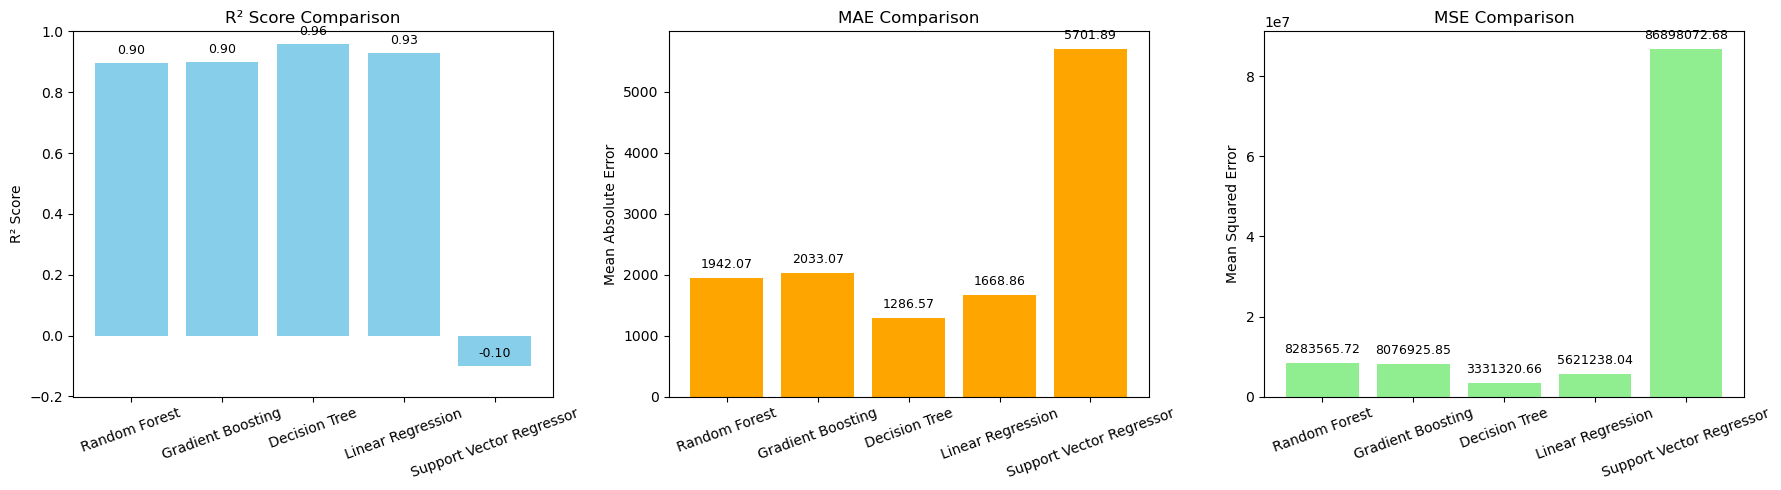

In [180]:

import matplotlib.pyplot as plt

# Plotting comparison
model_names = [
    "Random Forest", 
    "Gradient Boosting", 
    "Decision Tree", 
    "Linear Regression", 
    "Support Vector Regressor"
]


r2_scores = [lr_r2, dt_r2, rf_r2, gb_r2, svr_r2]
mae_scores = [lr_mae, dt_mae, rf_mae, gb_mae, svr_mae]
mse_scores = [lr_mse, dt_mse, rf_mse, gb_mse, svr_mse]


# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# R² Score Plot
axs[0].bar(model_names, r2_scores, color='skyblue')
axs[0].set_title("R² Score Comparison")
axs[0].set_ylabel("R² Score")
axs[0].set_ylim(min(r2_scores) - 0.1, 1)

# MAE Plot
axs[1].bar(model_names, mae_scores, color='orange')
axs[1].set_title("MAE Comparison")
axs[1].set_ylabel("Mean Absolute Error")

# MSE Plot
axs[2].bar(model_names, mse_scores, color='lightgreen')
axs[2].set_title("MSE Comparison")
axs[2].set_ylabel("Mean Squared Error")

# Rotate x-axis labels
for ax in axs:
    ax.tick_params(axis='x', rotation=20)

# Add value labels
for ax, scores in zip(axs, [r2_scores, mae_scores, mse_scores]):
    for i, v in enumerate(scores):
        offset = 0.02 * max(scores) if max(scores) > 1 else 0.02
        ax.text(i, v + offset, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

# Final layout
plt.tight_layout()
plt.show()


## 4. Feature Importance Analysis 

In [181]:

# Fit model on training data
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [182]:

importances = model.feature_importances_
feature_names = X_train.columns

# Combine into a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [183]:

importance_df = importance_df.reset_index(drop=True)
print(importance_df.head(10)) # Top 10 most important features


        Feature  Importance
0    enginesize    0.549869
1    curbweight    0.296434
2    highwaympg    0.045597
3    horsepower    0.030718
4      carwidth    0.013213
5     carlength    0.007658
6  carbrand_bmw    0.007475
7     wheelbase    0.007101
8       citympg    0.006212
9       peakrpm    0.005560


C:\Users\amrut\AppData\Local\Temp\ipykernel_36960\569622142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


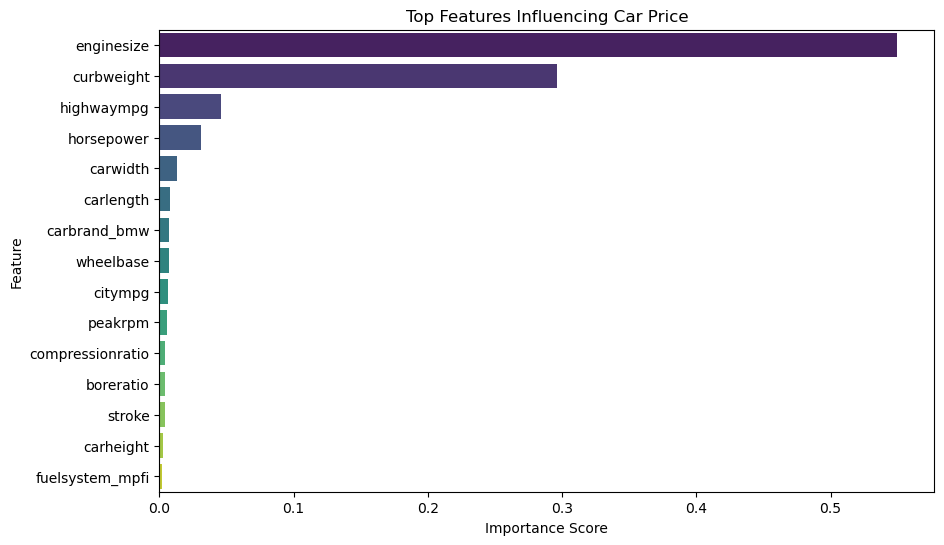

In [184]:

top_features = importance_df.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title("Top Features Influencing Car Price")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


## 5. Hyperparameter Tuning 

In [185]:

# Step 1: Define Parameter Grid

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [186]:

 # Step 2: Run GridSearchCV

from sklearn.model_selection import GridSearchCV

# Base model
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [187]:

 # Step 3: Evaluate the Tuned Model

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predict
tuned_preds = best_rf.predict(X_test)

# Evaluate
tuned_r2 = r2_score(y_test, tuned_preds)
tuned_mae = mean_absolute_error(y_test, tuned_preds)
tuned_rmse = mean_squared_error(y_test, tuned_preds, squared=False)

# Compare
print("Original R2:", rf_r2)
print("Tuned R2   :", tuned_r2)
print("Improved?  :", tuned_r2 > rf_r2)


Original R2: 0.9578014823361085
Tuned R2   : 0.9579600435558201
Improved?  : True


C:\Users\amrut\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
